Untersuche die Wirkung der Inhibitoren JD359 und BH267.meta auf den Influx von Lactat durch PfFNT über ilacco1.0 Biosensor

In [22]:
import sys
sys.path.insert(0, '../..')  # Füge das übergeordnete Verzeichnis zum Python-Pfad hinzu
from utils_functions import to_float_array, df_d0, dataframe1
import glob
import os
import pandas as pd
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt

In [23]:
data_path = '/workspaces/EWT/EWT7/data/EWT7.ods'
df_I_PfFNT_JD359 = pd.read_excel(data_path, engine='odf', sheet_name="Sheet1", skiprows=36)
df_I_PfFNT_BH267m = pd.read_excel(data_path, engine='odf', sheet_name="Sheet2", skiprows=36)

# Ersetze 'OVER' durch NaN
df_I_PfFNT_JD359 = df_I_PfFNT_JD359.replace('OVER', np.nan)
df_I_PfFNT_BH267m = df_I_PfFNT_BH267m.replace('OVER', np.nan)

print(df_I_PfFNT_BH267m)

    Startzeit:  27.11.2025 12:42:01 Unnamed: 2 Unnamed: 3 Unnamed: 4  \
0          NaN                  NaN        NaN        NaN        NaN   
1          NaN                  NaN        NaN        NaN        NaN   
2   Zyklus Nr.                    1          2          3          4   
3     Zeit [s]                    0         15         30         45   
4   Temp. [°C]                   --         --         --         --   
5           C1                29303      29932      30438      31284   
6           C2                30896      31220      31661      32385   
7           C3                33083      32996      33115      34007   
8           C4                16460      16720      16913      17314   
9           C5                18845      19090      19223      19618   
10          C6                16531      16840      17039      17331   
11          D1                37215      36536      36809      36783   
12          D2                38720      38331      38940      3

In [24]:
# Daten Verarbeitung
#JD359
I_PfFNT_ilacco1_0_100µM_JD359 = dataframe1(df_I_PfFNT_JD359,3,5,6,7)
I_PfFNT_FP_ilacco1_0_100μM_JD359 = dataframe1(df_I_PfFNT_JD359,3,8,9,10)
I_PfFNT_ilacco1_0_10µM_JD359 = dataframe1(df_I_PfFNT_JD359,3,14,15,16)
I_PfFNT_FP_ilacco1_0_10μM_JD359 = dataframe1(df_I_PfFNT_JD359,3,17,18,19)

I_PfFNT_ilacco1_0 =  dataframe1(df_I_PfFNT_JD359,3,11,12,13)
I_PfFNT_FP_ilacco1_0 = dataframe1(df_I_PfFNT_JD359,3,20,21,22)

#BH257m
I_PfFNT_ilacco1_0_100µM_BH257m = dataframe1(df_I_PfFNT_BH267m,3,5,6,7)
I_PfFNT_FP_ilacco1_0_100μM_BH257m = dataframe1(df_I_PfFNT_BH267m,3,8,9,10)
I_PfFNT_ilacco1_0_10µM_BH257m = dataframe1(df_I_PfFNT_BH267m,3,11,12,13)
I_PfFNT_FP_ilacco1_0_10μM_BH257m = dataframe1(df_I_PfFNT_BH267m,3,14,15,16)
print(I_PfFNT_FP_ilacco1_0_10μM_BH257m)

     Time  1.Messung  2.Messung  3.Messung  Mittelwerte  Standardabweichung
0     0.0   0.000000   0.000000   0.000000     0.000000            0.000000
1    15.0   0.006225  -0.005918   0.016338     0.005548            0.011144
2    30.0   0.035016   0.016249   0.042385     0.031217            0.013476
3    45.0   0.046472   0.022271   0.070184     0.046309            0.023957
4    60.0   0.063462   0.025074   0.067437     0.051991            0.023395
5    75.0   0.074615   0.023672   0.083207     0.060498            0.032180
6    90.0   0.080711   0.036754   0.098314     0.071926            0.031706
7   105.0   0.099818   0.062503   0.125166     0.095829            0.031521
8   120.0   0.085898   0.029487   0.093910     0.069765            0.035111
9   135.0   0.115900   0.065203   0.123603     0.101569            0.031728
10  150.0   0.114776   0.058246   0.121709     0.098244            0.034812
11  165.0   0.103666   0.059544   0.115647     0.092952            0.029546
12  180.0   

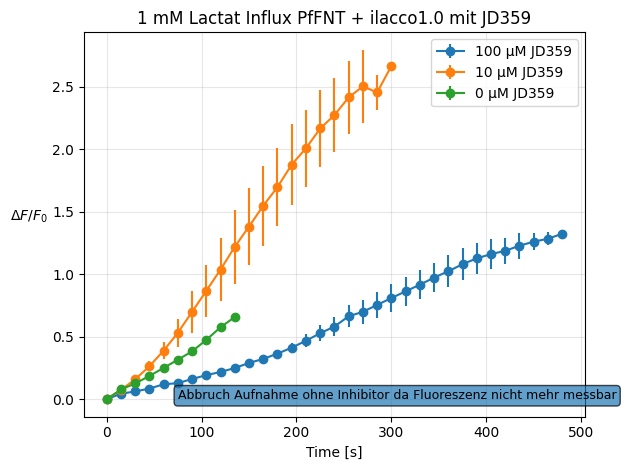

In [25]:
df_PfFNT = [
    I_PfFNT_ilacco1_0_100µM_JD359,
    I_PfFNT_ilacco1_0_10µM_JD359,
    I_PfFNT_ilacco1_0]
label = ["100 µM JD359","10 µM JD359","0 µM JD359"]
for df,label in zip(df_PfFNT, label):
    plt.errorbar(df['Time'], df['Mittelwerte'], yerr=df['Standardabweichung'], fmt='-o', label=label)
plt.title(f'1 mM Lactat Influx PfFNT + ilacco1.0 mit JD359')
plt.xlabel('Time [s]')
plt.ylabel(r'$\Delta F/F_0$', rotation=0, labelpad=12)

plt.text(75, 0.0, 'Abbruch Aufnahme ohne Inhibitor da Fluoreszenz nicht mehr messbar', 
         bbox=dict(boxstyle='round', alpha=0.7),
         fontsize=9)

ax = plt.gca()
ax.yaxis.set_label_coords(-0.11, 0.5)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.legend()

outpath = os.path.join('..', 'figures', 'Influx PfFNT+ilacco1.0+JD359.png')

plt.savefig(outpath, dpi=300, bbox_inches='tight')

plt.show()


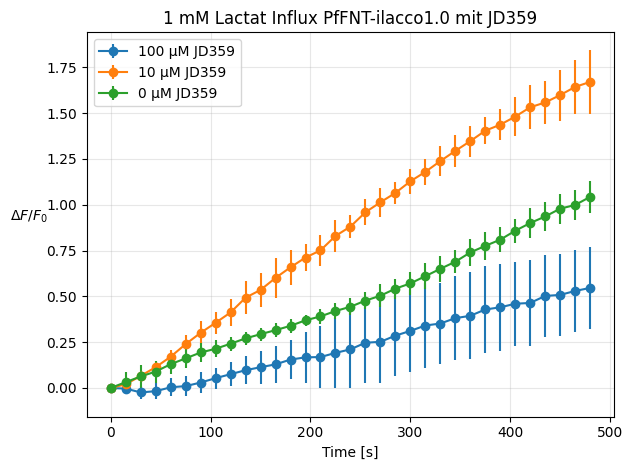

In [26]:
df_PfFNT_FP = [I_PfFNT_FP_ilacco1_0_100μM_JD359,
                I_PfFNT_FP_ilacco1_0_10μM_JD359,
                I_PfFNT_FP_ilacco1_0]
label_FP = ["100 µM JD359","10 µM JD359","0 µM JD359"]
for df,label in zip(df_PfFNT_FP, label_FP):
    plt.errorbar(df['Time'], df['Mittelwerte'], yerr=df['Standardabweichung'], fmt='-o', label=label)

plt.title(f'1 mM Lactat Influx PfFNT-ilacco1.0 mit JD359')
plt.xlabel('Time [s]')
plt.ylabel(r'$\Delta F/F_0$', rotation=0, labelpad=12)
ax = plt.gca()
ax.yaxis.set_label_coords(-0.11, 0.5)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.legend()


outpath = os.path.join('..', 'figures', 'Influx PfFNT-ilacco1.0(FP)+JD359.png')

plt.savefig(outpath, dpi=300, bbox_inches='tight')

plt.show()

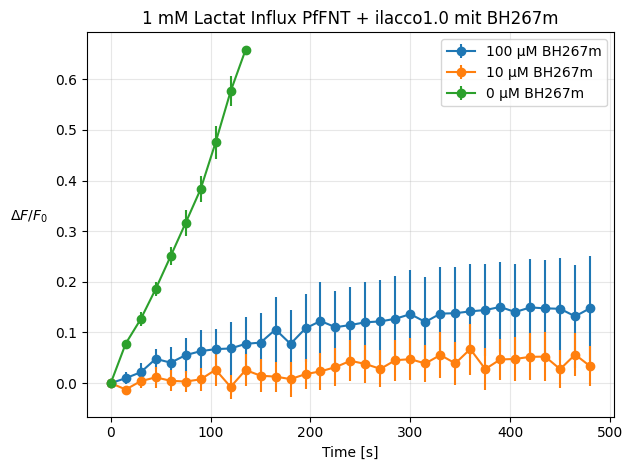

In [27]:
df_PfFNT_BH = [
    I_PfFNT_ilacco1_0_100µM_BH257m,
    I_PfFNT_ilacco1_0_10µM_BH257m,
    I_PfFNT_ilacco1_0]
label_BH = ["100 µM BH267m","10 µM BH267m","0 µM BH267m"]
for df,label in zip(df_PfFNT_BH, label_BH):
    plt.errorbar(df['Time'], df['Mittelwerte'], yerr=df['Standardabweichung'], fmt='-o', label=label)

plt.title(f'1 mM Lactat Influx PfFNT + ilacco1.0 mit BH267m')
plt.xlabel('Time [s]')
plt.ylabel(r'$\Delta F/F_0$', rotation=0, labelpad=12)
ax = plt.gca()
ax.yaxis.set_label_coords(-0.11, 0.5)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.legend()

outpath = os.path.join('..', 'figures', 'Influx PfFNT+ilacco1.0+BH267m.png')

plt.savefig(outpath, dpi=300, bbox_inches='tight')

plt.show()

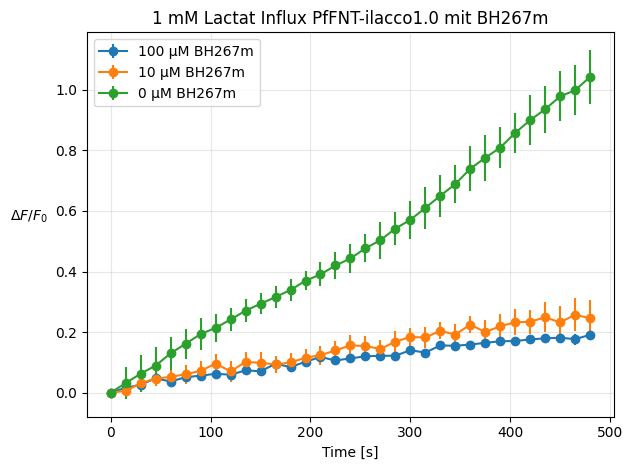

In [28]:
df_PfFNT_FP_BH = [I_PfFNT_FP_ilacco1_0_100μM_BH257m,
                  I_PfFNT_FP_ilacco1_0_10μM_BH257m,
                  I_PfFNT_FP_ilacco1_0]
label_FP_BH = ["100 µM BH267m","10 µM BH267m","0 µM BH267m"]
for df,label in zip(df_PfFNT_FP_BH, label_FP_BH):
    plt.errorbar(df['Time'], df['Mittelwerte'], yerr=df['Standardabweichung'], fmt='-o', label=label)

plt.title(f'1 mM Lactat Influx PfFNT-ilacco1.0 mit BH267m')
plt.xlabel('Time [s]')
plt.ylabel(r'$\Delta F/F_0$', rotation=0, labelpad=12)
ax = plt.gca()
ax.yaxis.set_label_coords(-0.11, 0.5)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.legend()

outpath = os.path.join('..', 'figures', 'Influx PfFNTi-lacco1.0(FP)+BH267m.png')

plt.savefig(outpath, dpi=300, bbox_inches='tight')
